In [66]:
import numpy as np
import matplotlib.pyplot as plt
import iop_ext as iop
import lf14 as lf
import math as math

In [67]:
#constants
#use NEA & use constants regarding a singular exoplanet
au=1.49598e11 #meters - astronomical unit(dist. from Earth to Sun)
L_sun=3.828e26 #Watts - luminosity of our star
M_sun=1.989e30 #Kg - mass of our star
M_ea=5.97219e24 #Kg - mass of earth
R_ea=6.371e6 #meters - radius of earth
L_star=0.5*L_sun #placeholder 
M_star=0.665*M_sun
Teq=871 # Equilibrium temperature in Kelvin
a= 0.0422*au #semimajor axis
a_0 = 0.5 ##slope at which L_He decreases over time
yr=3600*24*365 #Converting year to seconds
t_sat=1e8*yr #100 million years to seconds
cmf_p=0.325 #reduced core mass fraction
G=6.67e-11 #Universal Gravitational Constant
L_sat=(10**-3.5)*L_sun*(M_star/M_sun) #Saturation Luminosity
pi=math.pi
x0=0.5 #initial water mass fraction
Gyr=1e9 #billion years


In [68]:
#importing  mass-radius models from Li Zeng 2016

#Pure Iron Planet
list_zeng_fe_m, list_zeng_fe_r = np.loadtxt("./models/zeng-iron.dat",unpack=True,usecols=(0,1))
print("Mass-radius data curves imported successfully")



Mass-radius data curves imported successfully


In [69]:
#Importing Data Mass&Radius
nea_output_file= "./data/catalog_exoplanets.dat"
list_catalog_rp, list_catalog_mp = np.genfromtxt(nea_output_file, delimiter="\t",unpack=True,usecols=(1,4),filling_values=0.0)

print("Exoplanet catalog imported successfully")

Exoplanet catalog imported successfully


In [70]:
#50% Water Planetsˇ
list_zeng_2016_m, list_zeng_2016_w = np.loadtxt("./data/Zeng2016.dat", unpack=True, usecols=(0,3))

In [71]:
#Pure Rock Planet
list_zeng_rk_m, list_zeng_rk_r = np.loadtxt("./models/zeng-rock.dat",unpack=True,usecols=(0,1))
print("Rock success")

Rock success


In [72]:
#Earth
list_zeng_ea_m, list_zeng_ea_r = np.loadtxt("./models/zeng-earth.dat",unpack=True,usecols=(0,1))
print("Earth success")

Earth success


In [9]:
#50% Steam Line
cmf=0.325
wmf=0.5
t=600
steam_earth_m=np.logspace(np.log10(0.1),np.log10(20.0),1000)
steam_earth_r=np.array([iop.radius_iop(cmf,wmf,t, mass) for mass in steam_earth_m])

errors=np.array([iop.error_iop(cmf,wmf,t,mass) for mass in steam_earth_m])
mask_valid=(errors==0)

In [10]:
#LF14 model for 5% H2-He Planets
met=1.0
age=5.0
fenv=5.0
teq=600
steam_earth_m2=np.logspace(np.log10(0.1),np.log10(20.0),1000)
steam_earth_r2=np.array([lf.radius_lf14(met,age,fenv,teq, mass) for mass in steam_earth_m])

In [104]:
#IMPORTING EVOLUTION DATA
K218b_age,K218b_m, K218b_r, K218b_wmf, K218b_error, K218b_ml = np.loadtxt("./data/evolution_K2-18b_AC.dat", unpack=True, usecols=(0,1,2,3,4,5))

print("planet evolution successfully imported")

planet evolution successfully imported


In [131]:
#IMPORTING JAVIER DATA #1
Kep_138c_m, Kep_138c_r = np.loadtxt("./data/evolution_Kepler-138c_JJ.dat", unpack=True, usecols=(1,2))

print("planet evolution successfully imported.")

planet evolution successfully imported.


In [132]:
#IMPORTING JAVIER DATA #2
TOI_178b_m, TOI_178b_r = np.loadtxt("./data/evolution_TOI-178b_JJ.dat", unpack=True, usecols=(1,2))

print("planet evolution successfully imported.")

planet evolution successfully imported.


In [127]:
#IMPORTING HAILEY DATA
TOI_836b_m, TOI_836b_r = np.loadtxt("./data/evolution_TOI-836b_HF.dat", unpack=True, usecols=(1,2))

print("planet evolution successfully imported.")

planet evolution successfully imported.


In [133]:
#IMPORTING JAVIER DATA #3
K2_3c_m, K2_3c_r = np.loadtxt("./data/evolution_K2-3c_JJ.dat", unpack=True, usecols=(1,2))

print("planet evolution successfully imported.")

planet evolution successfully imported.


In [128]:

#IMPORTING EVOLUTION DATA
TOI_1075b_age,TOI_1075b_m, TOI_1075b_r, TOI_1075b_wmf, TOI_1075b_error, TOI_1075b_ml = np.loadtxt("./data/evolution_TOI-1075b_AC.dat", unpack=True, usecols=(0,1,2,3,4,5))

print("planet evolution successfully imported.")

planet evolution successfully imported.


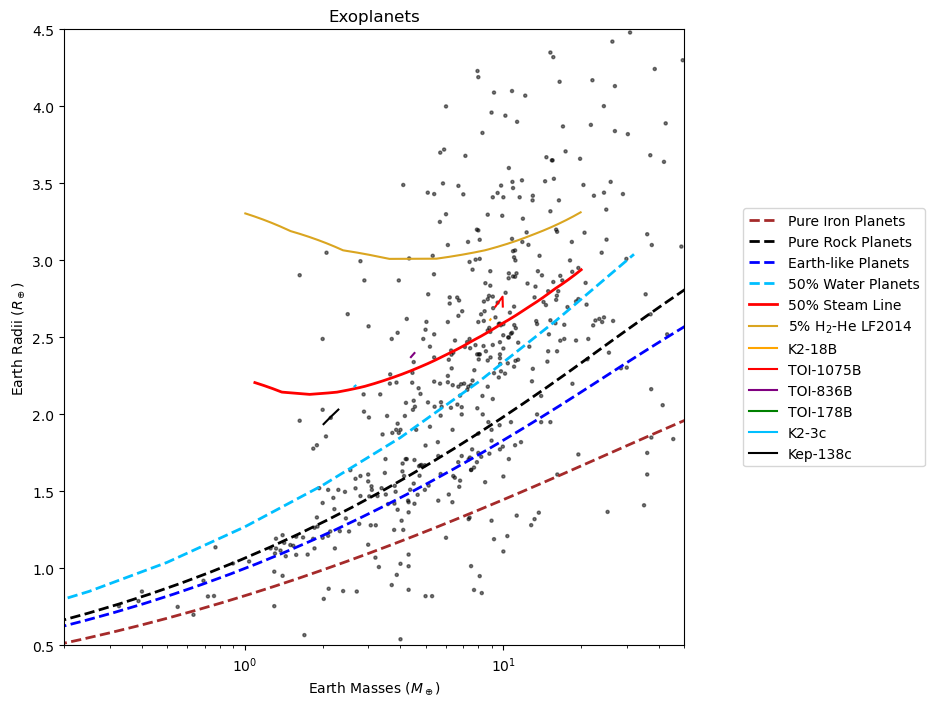

In [147]:
#Plotting

N_exo= len(list_catalog_mp) #length/numbers of data values in list list_catalog_mp)
point_sizes = np.ones(N_exo)*5.0 #Scales size of points

#Plot the models
plt.plot(list_zeng_fe_m, list_zeng_fe_r, color="brown", linestyle="--", linewidth=2, label="Pure Iron Planets")
plt.plot(list_zeng_rk_m, list_zeng_rk_r, color="black", linestyle="--", linewidth=2, label="Pure Rock Planets")
plt.plot(list_zeng_ea_m, list_zeng_ea_r, color="blue", linestyle="--", linewidth=2, label="Earth-like Planets")
plt.plot(list_zeng_2016_m, list_zeng_2016_w, color="deepskyblue", linestyle="--", linewidth=2, label="50% Water Planets")
plt.plot(steam_earth_m[mask_valid],steam_earth_r[mask_valid],color="red",linestyle="-",linewidth=2,label="50% Steam Line")
plt.plot(steam_earth_m2,steam_earth_r2,color="goldenrod",linestyle="-",label=r"5% H$_2$-He LF2014") #5% of mass is hydrogen, 95% rocky core
#plt.plot((list_planetevo_m/M_ea), (list_planetevo_r/R_ea), color="green", linestyle="-", label="TOI-836B")
plt.plot((K218b_m/M_ea),(K218b_r/R_ea),color="orange",linestyle="-",linewidth=2label="K2-18B")
plt.plot((TOI_1075b_m/M_ea),(TOI_1075b_r/R_ea),color="red",linestyle="-",label="TOI-1075B")
plt.plot((TOI_836b_m/M_ea),(TOI_836b_r/R_ea),color="purple",linestyle="-",label="TOI-836B")
plt.plot((TOI_178b_m/M_ea),(TOI_178b_r/R_ea),color="green",linestyle="-",label="TOI-178B")
plt.plot((K2_3c_m),(K2_3c_r),color="deepskyblue",linestyle="-",label="K2-3c")
plt.plot((Kep_138c_m),(Kep_138c_r),color="black",linestyle="-",label="Kep-138c")
plt.plot()
plt.plot()
plt.plot()
#Figure details
plt.scatter(list_catalog_mp,list_catalog_rp, color="black",alpha=0.5, sizes=point_sizes)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.xscale("log")    #Sets x-axis to logarithmic scale
plt.xlim(0.2,50)   #Bounding x-axis to 0.2 Earth masses to 50 Earth masses
plt.ylim(0.5,4.5)  #0.5 Earth radii to 4.5 Earth radii
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5)) #Adding legend to graph
#Labelling
plt.title("Exoplanets")
plt.xlabel("Earth Masses ($M_\\oplus$)")
plt.ylabel("Earth Radii ($R_\\oplus$)")
plt.show()

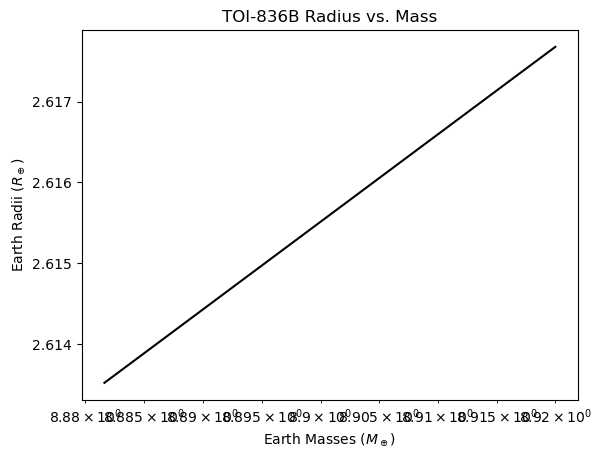

In [107]:
plt.plot((K218b_m/M_ea), (K218b_r/R_ea), color="black", linestyle="-", label="Simulated Planet")
plt.xscale("log") 
plt.title("TOI-836B Radius vs. Mass")
plt.xlabel("Earth Masses ($M_\\oplus$)")
plt.ylabel("Earth Radii ($R_\\oplus$)")
plt.show()

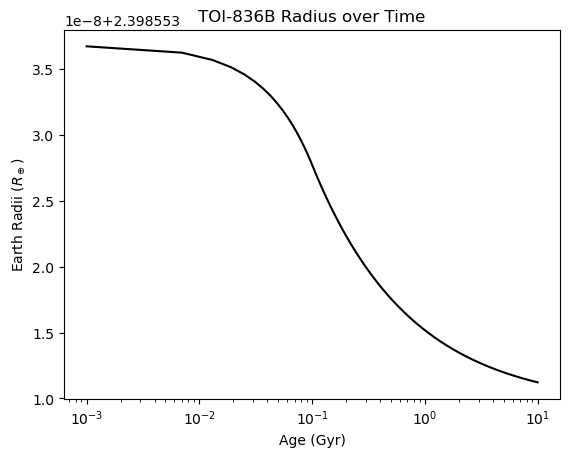

In [59]:
plt.plot(age/(Gyr*yr), (list_planetevo_r/R_ea), color="black", linestyle="-", label="Simulated Planet")
plt.xscale("log") 
plt.title("TOI-836B Radius over Time")
plt.xlabel("Age (Gyr)")
plt.ylabel("Earth Radii ($R_\\oplus$)")
plt.show()

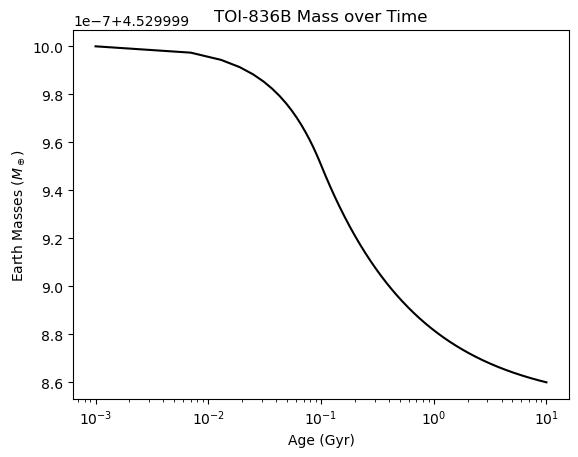

In [60]:
plt.plot(age/(Gyr*yr), (list_planetevo_m/M_ea), color="black", linestyle="-", label="Simulated Planet")
plt.xscale("log") 
plt.title("TOI-836B Mass over Time")
plt.xlabel("Age (Gyr)")
plt.ylabel("Earth Masses ($M_\\oplus$)")
plt.show()

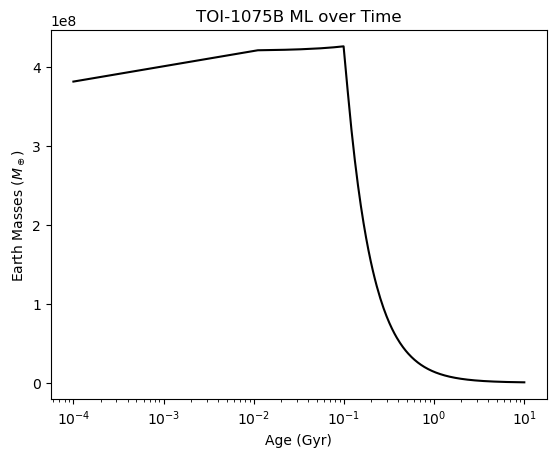

In [124]:
plt.plot(TOI_1075b_age/(Gyr*yr), TOI_1075b_ml, color="black", linestyle="-", label="Simulated Planet")
plt.xscale("log") 
plt.title("TOI-1075B ML over Time")
plt.xlabel("Age (Gyr)")
plt.ylabel("Earth Masses ($M_\\oplus$)")
plt.show()